**Image Classification**




In [1]:
## tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

## helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ['T-Shirt/top', 'Trouser', 'pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'ankle boot']


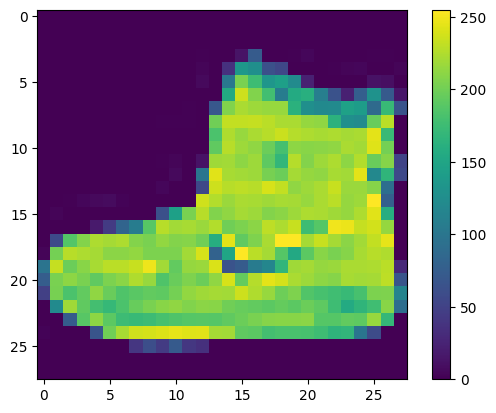

In [4]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()


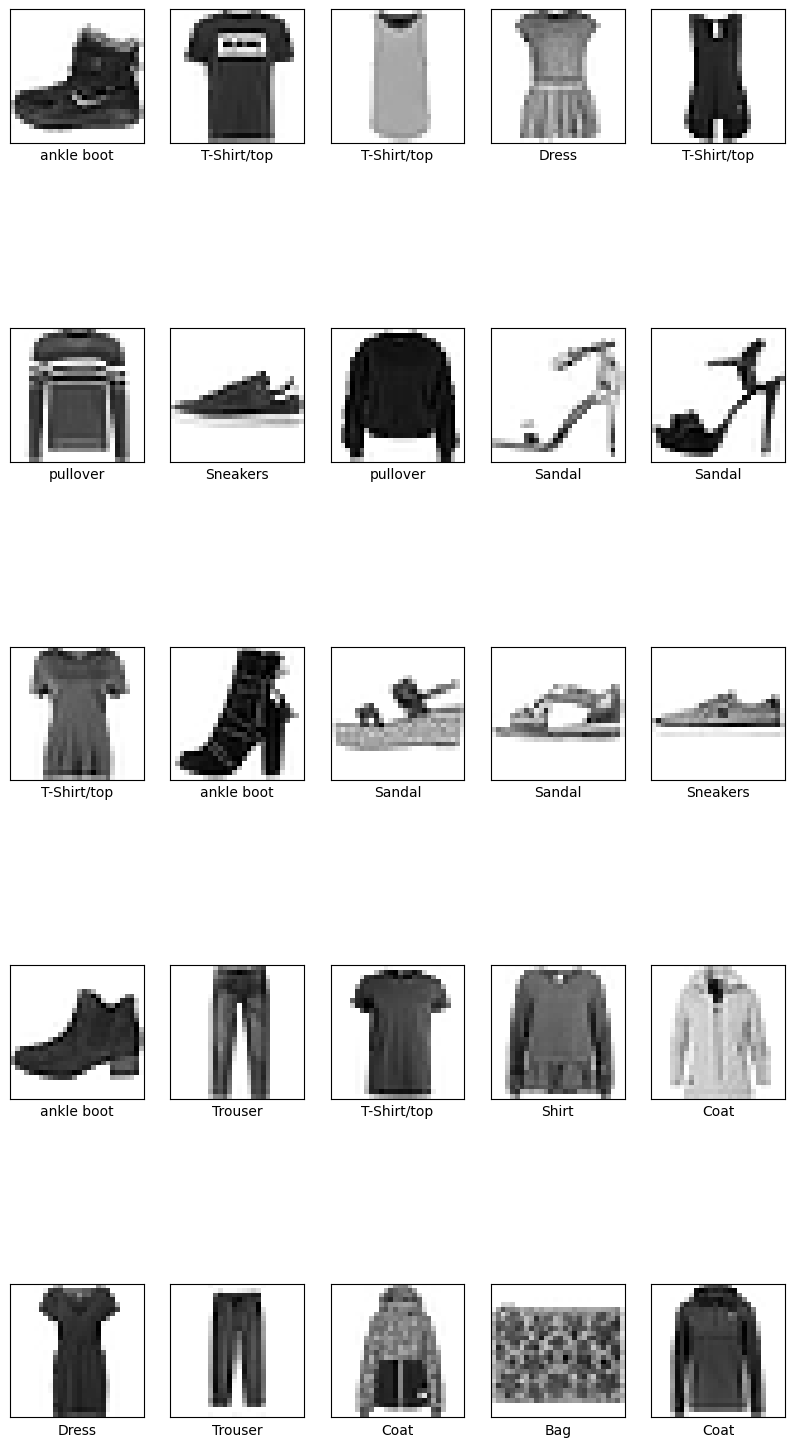

In [5]:
plt.figure(figsize=(10,20))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [8]:
##fitting the model
model.fit(train_image, train_labels, epochs =10)

##evaluate the accuracy
test_loss, test_acc =model.evaluate(test_image, test_labels, verbose = 2)
print('\ntest Accuracy:' , test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6649 - loss: 10.0186
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7252 - loss: 0.7202
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7492 - loss: 0.6373
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7779 - loss: 0.5838
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8079 - loss: 0.5437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8269 - loss: 0.5040
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8280 - loss: 0.5001
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8293 - loss: 0.4923
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8320 - loss: 0.4958
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8349 - loss: 0.4736
313/313 - 1s - 2ms/step - accuracy: 0.8170 - loss: 0.5524

test Accuracy: 0.8169999718666077


In [9]:
##make predictions

probability_model = tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.1471338e-16, 1.5565293e-14, 0.0000000e+00, 3.9788951e-13,
       0.0000000e+00, 1.5956324e-01, 4.4544678e-21, 1.0606199e-01,
       2.0282345e-11, 7.3437464e-01], dtype=float32)

In [10]:
np.argmax(predictions[0])


np.int64(9)

In [11]:
test_labels[0]


np.uint8(9)

In [12]:
def plt_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap  = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'red'
  else:
    color = 'blue'

  plt.xlabel("{} {:2.0f}% ({})" .format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color = color)

def plot_value_array (i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

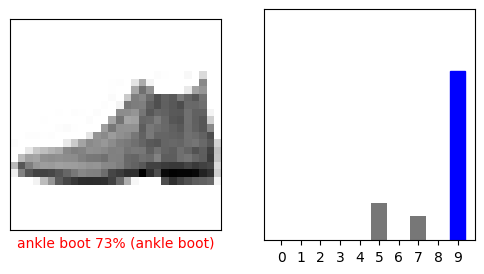

In [13]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plt_image(i, predictions[i], test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions[0] , test_labels)
plt.show()

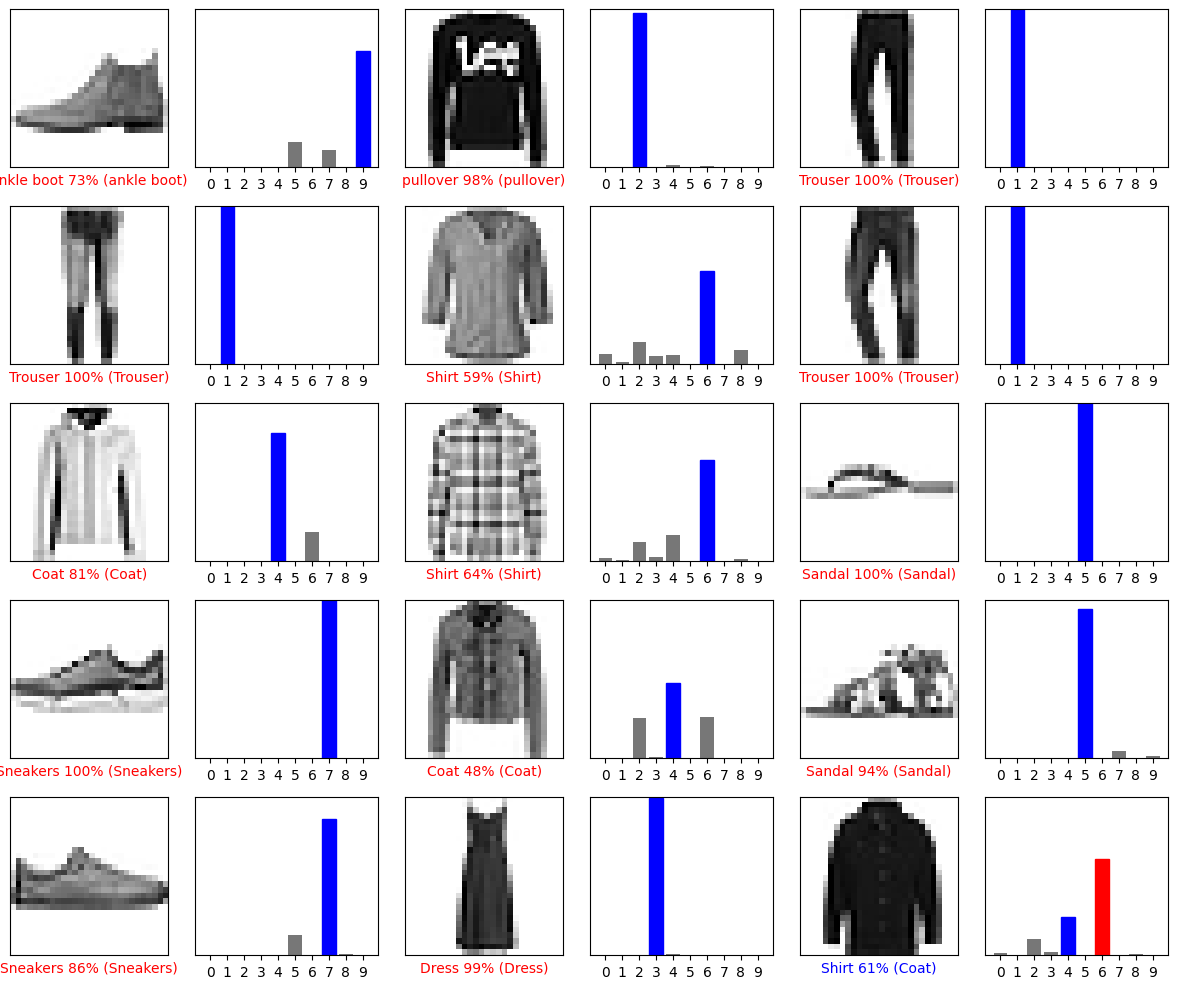

In [14]:
##plot the first X test images, their predicted labels and true labels
## color predictions in blue and incoorect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt_image(i, predictions[i], test_labels, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()